[INDICIUM] Ciências de Dados

**Desafio**

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado). Você poderá encontrar em anexo um dicionário dos dados.


# Entregas

    - Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!
    - Responda também às seguintes perguntas:
        a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
        b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
        c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?
    - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
    - Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

    

# Instruções de Entrega:
- Você tem até 7 dias corridos para a entrega, contados a partir do recebimento deste desafio.
- Envie o seu relatório dentro da sua data limite para o email: selecao.lighthouse@indicium.tech
- O arquivo de entrega deve ser nomeado como: LH_CD_SEUNOME
- Salve o modelo desenvolvido no formato .pkl. 
- A entrega deve ser feita através de um repositório de código público que contenha:
    - README explicando como instalar e executar o projeto
    - Arquivo de requisitos com todos os pacotes utilizados e suas versões
    - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
    - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
    - Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.

# Dicionário dos dados
## A base de dados de treinamento contém 16 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
- nome - Representa o nome do anúncio
- host_id - Representa o id do usuário que hospedou o anúncio
- host_name – Contém o nome do usuário que hospedou o anúncio
- bairro_group - Contém o nome do bairro onde o anúncio está localizado
- bairro - Contém o nome da área onde o anúncio está localizado
- latitude - Contém a latitude do local
- longitude - Contém a longitude do local
- room_type – Contém o tipo de espaço de cada anúncio
- price - Contém o preço por noite em dólares listado pelo anfitrião
- minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
- numero_de_reviews - Contém o número de comentários dados a cada listagem
- ultima_review - Contém a data da última revisão dada à listagem
- reviews_por_mes - Contém o número de avaliações fornecidas por mês
- calculado_host_listings_count - Contém a quantidade de listagem por host
- disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

# Etapas:

## Visualizar os dados
## Manipular e preparar os dados
## Análise exploratória (EDA)
## Decidir modelos de machine learning
## Testes, Resultados e Hipóteses
## Entregar demandas do desafio

Dependências necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

C:\Users\ianpv\AppData\Local\Temp\ipykernel_9224\3537843849.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Visualizar Dados
- Análise geral das features
- Distingguir formato das features (int, float, char)
- Identificar anomalias, dados ausentes e erros

In [2]:
indicium = pd.read_csv('C:/Users/ianpv/OneDrive/Light_house/teste_indicium_precificacao.csv')
indicium.describe()


id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

In [4]:
# Análise Geral
indicium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
# Segregação de Dados por Tipo de Dados

colunas_por_dtype = indicium.columns.to_series().groupby(indicium.dtypes).groups

for dtype, colunas in colunas_por_dtype.items():
    print(f"Tipo de Dados: {dtype}")
    print(", ".join(colunas))
    print("\n")

Tipo de Dados: int64
id, host_id, price, minimo_noites, numero_de_reviews, calculado_host_listings_count, disponibilidade_365


Tipo de Dados: float64
latitude, longitude, reviews_por_mes


Tipo de Dados: object
nome, host_name, bairro_group, bairro, room_type, ultima_review




 Observado a presença de 16 features de 3 tipos variados (int,float, e object) totalizando 48.894 linhas as features nome, host_name, ultima_review e reviews_por_mes apresentam valores nulos.
- Usar funções para contabilizar a quantidade de valores ausentes em cada features.

In [6]:
indicium.isnull().sum()

# ultima_review e reviews_por_mes tem muitos valores nulos, vamos calcular a porcentagem de valores nulos para decidir o que fazer com eles

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [7]:
# Máscara booleana para valores nulos
ultimo_review_nulos = indicium['ultima_review'].isnull().sum()
reviews_por_mes_nulos = indicium['reviews_por_mes'].isnull().sum()

# Calculando a porcentagem de valores nulos
ultimo_review_nulos_percent = (ultimo_review_nulos/len(indicium['ultima_review']))*100
reviews_por_mes_nulos_percent = (reviews_por_mes_nulos/len(indicium['reviews_por_mes']))*100

# Imprimindo os resultados
print('Porcentagem de valores nulos em ultima_review: {:.2f}%'.format(ultimo_review_nulos_percent))
print('Porcentagem de valores nulos em reviews_por_mes: {:.2f}%'.format(reviews_por_mes_nulos_percent))

Porcentagem de valores nulos em ultima_review: 20.56%
Porcentagem de valores nulos em reviews_por_mes: 20.56%


Notamos uma porcentagem alta de dados ausentes para as duas features de reviews, porém não é uma uma quantidade alta suficiente para dropar as colunas. Por se tratar de avaliações do imóvel de hospedagem deve ser analisado com cautela.
Iremos investigar se Há correlações entre as ausências de dados usando um matrix.
Por se tratar de duas features envolvidas com reviews e apresentarem a mesma quantidade de valores ausentes e provável que haja uma forte correlação.

<Axes: >

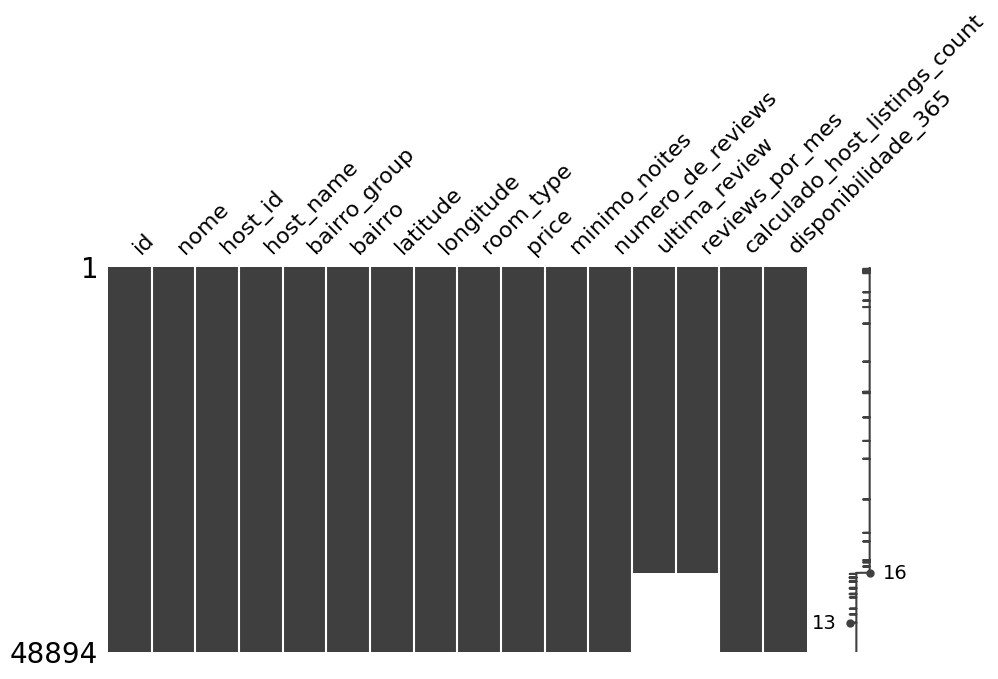

In [8]:
matrix = indicium.sort_values('reviews_por_mes')
msno.matrix(matrix, figsize=(10, 5))

#O número total de reviews não apresenta nenhum valor ausente e correlação com os outros valores ausentes.
# Vamos criar um dataset com as três features que envolvem reviews para uma melhor análise.

In [9]:
indicium_reviews = indicium[['ultima_review', 'reviews_por_mes', 'numero_de_reviews']]
indicium_reviews.sample(30)
# vamos imprimir apenas as linhas que possuem valores nulos das features ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews.isnull().any(axis=1)]
#vamos confirmar se todos os valores 0 de numero_de_reviews possuem valores nulos em ultima_review e reviews_por_mes
indicium_reviews[indicium_reviews['numero_de_reviews'] == 0].isnull().sum()

ultima_review        10052
reviews_por_mes      10052
numero_de_reviews        0
dtype: int64

In [10]:
# Vamos calcular a média, mediana e moda de ultima_review, reviews_por_mes e numero_de_reviews
media_ultima_review = indicium['reviews_por_mes'].mean()
mediana_ultima_review = indicium['reviews_por_mes'].median()
moda_ultima_review = indicium['reviews_por_mes'].mode()
print('Média de reviews_por_mes: {:.2f}'.format(media_ultima_review))
print('Mediana de reviews_por_mes: {:.2f}'.format(mediana_ultima_review))
print('Moda de reviews_por_mes: {:.2f}'.format(moda_ultima_review[0]))
print('\n')
media_numero_de_reviews = indicium['numero_de_reviews'].mean()
mediana_numero_de_reviews = indicium['numero_de_reviews'].median()
moda_numero_de_reviews = indicium['numero_de_reviews'].mode()
print('Média de numero_de_reviews: {:.2f}'.format(media_numero_de_reviews))
print('Mediana de numero_de_reviews: {:.2f}'.format(mediana_numero_de_reviews))
print('Moda de numero_de_reviews: {:.2f}'.format(moda_numero_de_reviews[0]))

Média de reviews_por_mes: 1.37
Mediana de reviews_por_mes: 0.72
Moda de reviews_por_mes: 0.02


Média de numero_de_reviews: 23.27
Mediana de numero_de_reviews: 5.00
Moda de numero_de_reviews: 0.00


# Manipulando e Preparando os dados
- Imputando valores ausentes e nulos
- Diagnosticar e tratar Outliers
- Transformação de dados
- Tidy Data

### Vamos abordar as técnicas de imputação de dados mais avançadas:
- Multiple Imputation by Chained Equations (MICE)
- Utilizar aprendizagem de máquina para escolha do valor adequado
-  KNN (Média dos k vizinhos mais próximos)  usando KNNImputer
- InterativeImputer (regressão múltipla)



In [3]:
from sklearn.impute import KNNImputer
import time

In [4]:
# Imputando os valores nulos com KNN
# Criando uma cópia profunda do dataset
indicium_knn_imputer = indicium.copy()

# Verificar qual a métrica de distância mais adequada para o problema
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
start_time_knn = time.time()
indicium_knn_imputer['numero_de_reviews'] = knn_imputer.fit_transform(indicium_knn_imputer[['numero_de_reviews']])
indicium_knn_imputer['reviews_por_mes'] = knn_imputer.fit_transform(indicium_knn_imputer[['reviews_por_mes']])
end_time_knn = time.time()
print('Tempo de execução do KNN Imputer: {:.4f} segundos'.format(end_time_knn - start_time_knn))

Tempo de execução do KNN Imputer: 27.8781 segundos


In [40]:
# Verificando se ainda existem valores nulos
indicium_knn_imputer.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [5]:
# Imputando os valores nulos com InterativeImputer
# Imputação com uma performance melhor que o KNN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

indicium_iterative_imputer = indicium.copy(deep=True)
# Pesquisar a melhor quantidade de iterações
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
start_time_interative = time.time()
indicium_iterative_imputer['numero_de_reviews'] = mice_imputer.fit_transform(indicium_iterative_imputer[['numero_de_reviews']])
indicium_iterative_imputer['reviews_por_mes'] = mice_imputer.fit_transform(indicium_iterative_imputer[['reviews_por_mes']])
end_time_interative = time.time()

elapsed_time = end_time_interative - start_time_interative
print('Tempo de execução: {:.2f} segundos'.format(elapsed_time))

Tempo de execução: 0.11 segundos


In [43]:
# Verificando se ainda existem valores nulos
indicium_iterative_imputer.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### Vamos diagnosticar e tratar Outliers usando:
- Regra empírica (para distribuição normal)
- IQR
- z-score

In [6]:
#Criar um novo dataset com as features de Dtype int64 e float64 (exceto latitude e longitude) para fazer um histograma

indicium_int_float = indicium_iterative_imputer.select_dtypes(include=['int64', 'float64']).drop(['latitude', 'longitude'], axis=1)



In [7]:
indicium_sampled_data = indicium_int_float.sample(frac=0.1)
sns.histplot(indicium_sampled_data, kde=False)
plt.title("Histograma e KDE (Kernel Density Estimation)")
plt.show()


# EDA

### Objetivos:
- Definir os atributos mais adequados.
- Encontrar padrões
- Validar resultados.
- Refinar Features que serão utilizados para ML

### Meios:
- EDA para garantir os melhores resultados para o projeto.


### Finalização:
- Resumo de dados através de estatísticas descritivas

**Métodos**
- Análise univariada - fornece estatísticas resumidas para cada atributo dos dados brutos
- Análise bivariada - busca relação entre cada atributo nos dados e a variável alvo
- Análise multivariada - busca por interações entre diferentes atributos nos dados
- Redução da dimensionalidade - ajuda a identificar os atributos mais relevante dos dados e permite o processamento de um volume reduzido de dados.

   
# Estudo de Caso


## 0. Configurações e leitura dos dados

Dependências

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
#from sklearn import ensemble, tree, linear_model
import missingno as msno

C:\Users\ianpv\AppData\Local\Temp\ipykernel_16844\3988168225.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Configuração de plots

In [3]:
plt.rcParams["figure.figsize"] = (6,3)


In [4]:
sns.set(style='ticks')

Carregar os dados

**Nota**: no tutorial original, o autor primeiro faz atividades de limpeza de dados e só depois faz análise exploratória. Neste curso, fizemos a preparação de dados no notebook anterior. Por isso estamos carregando um dataset chamado 'train_limpo'

In [14]:
#test = pd.read_csv('../data/raw/test.csv')
indicium = pd.read_csv('C:/Users/ianpv/OneDrive/light_house/teste_indicium_precificacao.csv')

## 1. Descrição básica  dos dados

O passo inicial é ter uma descrição básica. Use o método `describe()` para ter estatísticas descritivas. Este métodos são robustos, ou seja, não incluem os valores nulos dos dados. 

In [15]:
indicium.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

Veja também os dados categóricos

In [16]:
indicium.describe(exclude='number')

nome host_name bairro_group        bairro        room_type  \
count            48878     48873        48894         48894            48894   
unique           47904     11452            5           221                3   
top     Hillside Hotel   Michael    Manhattan  Williamsburg  Entire home/apt   
freq                18       417        21661          3920            25409   

       ultima_review  
count          38842  
unique          1764  
top       2019-06-23  
freq            1413

Use head(), tail() e sample() para ter uma ideia inicial sobre os dados

In [17]:
indicium.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

In [16]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1372  1455          20       FV         62.0     7500   Pave      Reg   
1373  1456          60       RL         62.0     7917   Pave      Reg   
1374  1457          20       RL         85.0    13175   Pave      Reg   
1375  1459          20       RL         68.0     9717   Pave      Reg   
1376  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... MiscVal MoSold YrSold SaleType  \
1372         Lvl    AllPub    Inside  ...       0     10   2009       WD   
1373         Lvl    AllPub    Inside  ...       0      8   2007       WD   
1374         Lvl    AllPub    Inside  ...       0      2   2010       WD   
1375         Lvl    AllPub    Inside  ...       0      4   2010       WD   
1376         Lvl    AllPub    Inside  ...       0      6   2008       WD   

     SaleCondition SalePrice  MSSubClass_scal  LotFrontage_scal  LotArea_scal  \
1372        Normal    185000        -0.873889         -0.357830     -0.542686   
1373        Normal    175000         0.074000         -0.357830     -0.433624   
1374        Normal    210000        -0.873889          0.756851      0.941544   
1375        Normal    142125        -0.873889         -0.067044      0.037145   
1376        Normal    147500        -0.873889          0.272207      0.094683   

      Neighborhood_code  
1372                 21  
1373                  8  
1374                 14  
1375                 12  
1376                  7  

[5 rows x 81 columns]

In [17]:
train.sample(n=10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
406    438          45       RM    50.000000     6000   Pave      Reg   
778    830         160       FV    24.000000     2544   Pave      Reg   
283    308          50       RM    70.049958     7920   Pave      IR1   
112    118          20       RL    74.000000     8536   Pave      Reg   
1295  1373          60       RL    75.000000     9750   Pave      Reg   
463    497          20       RL    70.049958    12692   Pave      IR1   
227    246          20       RL    80.000000    10400   Pave      Reg   
278    303          20       RL   118.000000    13704   Pave      IR1   
870    927          60       RL    93.000000    11999   Pave      Reg   
430    464          70       RL    74.000000    11988   Pave      IR1   

     LandContour Utilities LotConfig  ... MiscVal MoSold YrSold SaleType  \
406          Lvl    AllPub    Inside  ...       0      1   2009       WD   
778          Lvl    AllPub    Inside  ...       0      7   2006       WD   
283          Lvl    AllPub    Inside  ...       0      3   2008       WD   
112          Lvl    AllPub    Corner  ...       0      4   2007      New   
1295         Lvl    AllPub    Corner  ...       0      6   2006       WD   
463          Lvl    AllPub    Inside  ...       0      5   2007       WD   
227          Lvl    AllPub    Inside  ...       0      6   2006       WD   
278          Lvl    AllPub    Corner  ...       0      1   2006       WD   
870          Lvl    AllPub    Inside  ...       0      5   2007       WD   
430          HLS    AllPub    Inside  ...       0      8   2008       WD   

     SaleCondition SalePrice  MSSubClass_scal  LotFrontage_scal  LotArea_scal  \
406         Normal    119000        -0.281458         -0.939403     -0.934993   
778         Normal    147400         2.443723         -2.199477     -1.838870   
283         Normal     89500        -0.162972          0.032306     -0.432840   
112        Partial    155000        -0.873889          0.223742     -0.271732   
1295        Normal    274300         0.074000          0.272207      0.045775   
463         Normal    430000        -0.873889          0.032306      0.815221   
227         Normal    241500        -0.873889          0.514529      0.215775   
278         Normal    205000        -0.873889          2.356175      1.079898   
870         Normal    285000         0.074000          1.144566      0.633975   
430         Normal    188700         0.310972          0.223742      0.631098   

      Neighborhood_code  
406                   3  
778                  21  
283                   9  
112                   7  
1295                  5  
463                  15  
227                  14  
278                   5  
870                  16  
430                   6  

[10 rows x 81 columns]

Vale a penas verificar se a quantidade de tuplas e atributos está de acordo com a descrição dada.

In [18]:
train.shape , test.shape

((1377, 81), (1459, 80))

Vamos examinar as colunas numéricas no dataset

In [19]:
train_num_df = train.select_dtypes(include=['number'])
train_num_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSSubClass_scal',
       'LotFrontage_scal', 'LotArea_scal', 'Neighborhood_code'],
      dtype='object')

Agora, vamos ver as colunas categóricas

In [20]:
train_cat_df = train.select_dtypes(include=['object'])
train_cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## 2. Análise Univariada

### 2.1 Descrição dos atributos numéricas

In [22]:
train.skew(numeric_only=True).sort_values(ascending=False)[:5] 

3SsnPorch       37.107951
LowQualFinSF    19.090905
MiscVal          6.732612
KitchenAbvGr     4.503066
BsmtFinSF2       4.305999
dtype: float64

In [14]:
train.skew(numeric_only=True).sort_values(ascending=False)[:-6:-1] 

GarageYrBlt    -0.672165
YearBuilt      -0.635403
YearRemodAdd   -0.507104
GarageCars     -0.329559
Id             -0.011514
dtype: float64

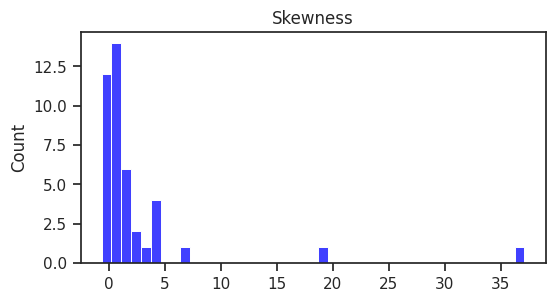

In [24]:
sns.histplot(train.skew(numeric_only=True),color='blue')
plt.title("Skewness")
plt.show()

In [26]:
train.kurt(numeric_only=True).sort_values(ascending=False)[:10]

3SsnPorch           1377.000000
LowQualFinSF         368.115220
MiscVal               45.991350
KitchenAbvGr          21.837511
BsmtFinSF2            20.693265
BsmtHalfBath          17.334108
LotFrontage           16.081279
LotFrontage_scal      16.081279
ScreenPorch           15.559526
MasVnrArea             9.769103
dtype: float64

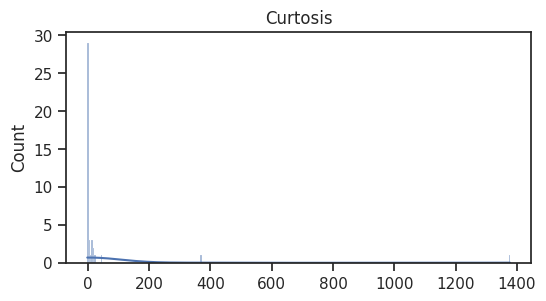

In [27]:
sns.histplot(train.kurt(numeric_only=True), kde = True)
plt.title("Curtosis")
plt.show()

**Comentário**: Há muitos atributos com distribução não normal, com caudas à esquerda e à direita. Também há algumas variáveis com curtosis muito alta (acima de 100), o que pode indicar forte presença de outliers. 

**Recomendação**: considerar tratamento de outliers para os atributos com maiores curtosis

Text(500000, 135.0, 'kurt = 5.28')

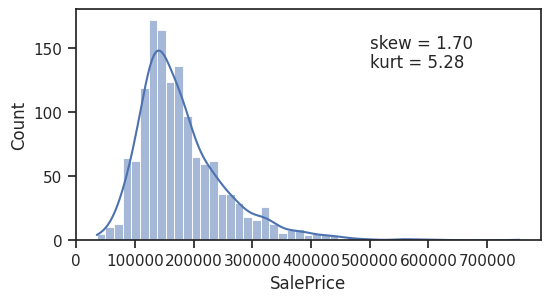

In [28]:
skw = train['SalePrice'].skew() 
krt = train['SalePrice'].kurt()
sns.histplot(train['SalePrice'], kde=True);
plt.text(500000,150.0,f"skew = {skw:0.2f}")
plt.text(500000,135.0,f"kurt = {krt:0.2f}")

É aparente que SalePrice não segue uma distribuição normal, com uma cauda à direita e com achatamento menor que normal. 


<Axes: >

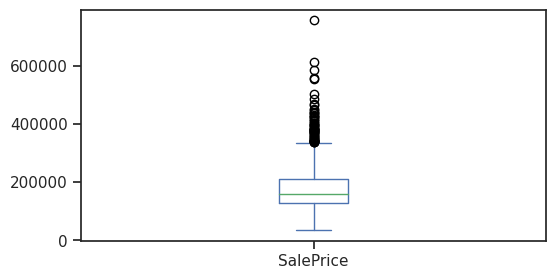

In [29]:
train['SalePrice'].plot.box()

A análise do boxplot mostra que realmente há muitos outliers acima de 400 mil dolares. 

Para se obter uma distribuição normal, pode-se tentar transformar os dados com log.  

In [30]:
logSalePrice = np.log(train['SalePrice'])
logSalePrice.skew()

0.07543544660626805

<Axes: xlabel='SalePrice', ylabel='Count'>

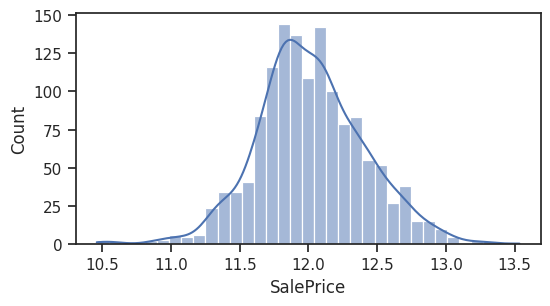

In [31]:
sns.histplot(logSalePrice,kde=True)

Vamos gerar vários boxplot para se ter uma ideia das distribuicões dos atributos numéricos

In [32]:
nf_cols = train_num_df.columns

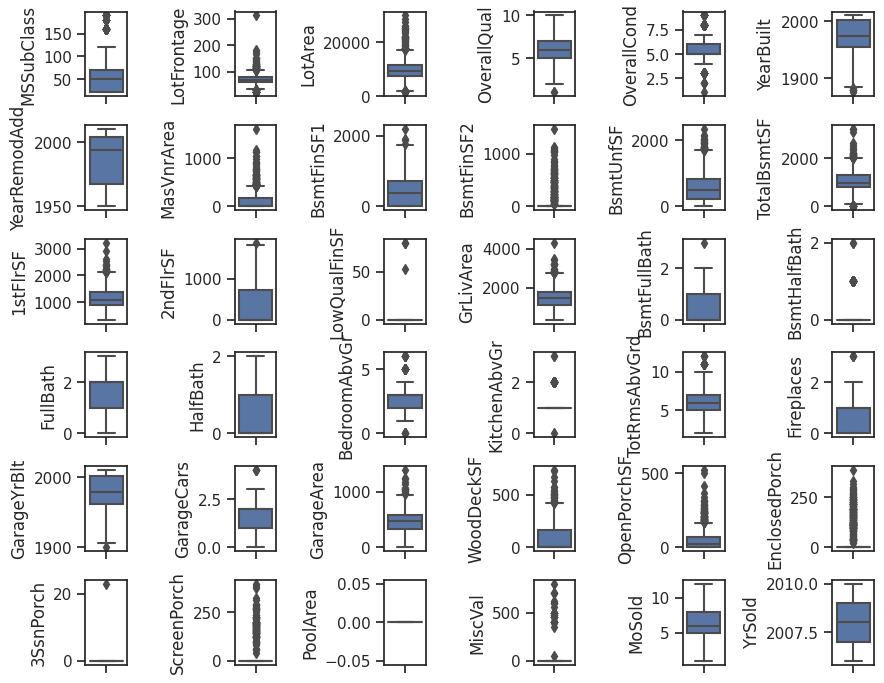

In [35]:
fig,axes=plt.subplots(nrows=6,
                      ncols=6,
                      figsize=(9,7))
axes = axes.flatten() # ou .ravel()
for i,col in enumerate(nf_cols[1:-1]):
    if (i<len(axes)):
        sns.boxplot(data=train,y=col,ax=axes[i])
plt.tight_layout()

Vamos observar as ditribuições das variáveis com maior assimetria (skewness)

### 2.2 Descrição dos atributos categóricas

In [36]:
train.describe(exclude='number')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1377   1377     1377        1377      1377      1377      1377   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1084   1373      885        1256      1376      1001      1316   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1377       1377       1377  ...        1377       1377   
unique           25          9          7  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            213       1196       1366  ...         690       1290   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1377       1377         1377       1377       1377       1377   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq          1017        897          649       1315       1327       1268   

       SaleType SaleCondition  
count      1377          1377  
unique        9             6  
top          WD        Normal  
freq       1191          1129  

[4 rows x 39 columns]

In [37]:
train_cat_df.shape

(1377, 39)

In [38]:
cat_cols=train_cat_df.columns

In [39]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print(f"'{column_name}' has '{unique_category}' unique categories")

'MSZoning' has '5' unique categories
'Street' has '2' unique categories
'LotShape' has '4' unique categories
'LandContour' has '4' unique categories
'Utilities' has '2' unique categories
'LotConfig' has '5' unique categories
'LandSlope' has '3' unique categories
'Neighborhood' has '25' unique categories
'Condition1' has '9' unique categories
'Condition2' has '7' unique categories
'BldgType' has '5' unique categories
'HouseStyle' has '8' unique categories
'RoofStyle' has '6' unique categories
'RoofMatl' has '5' unique categories
'Exterior1st' has '15' unique categories
'Exterior2nd' has '16' unique categories
'MasVnrType' has '3' unique categories
'ExterQual' has '4' unique categories
'ExterCond' has '5' unique categories
'Foundation' has '6' unique categories
'BsmtQual' has '4' unique categories
'BsmtCond' has '4' unique categories
'BsmtExposure' has '4' unique categories
'BsmtFinType1' has '6' unique categories
'BsmtFinType2' has '6' unique categories
'Heating' has '6' unique categori

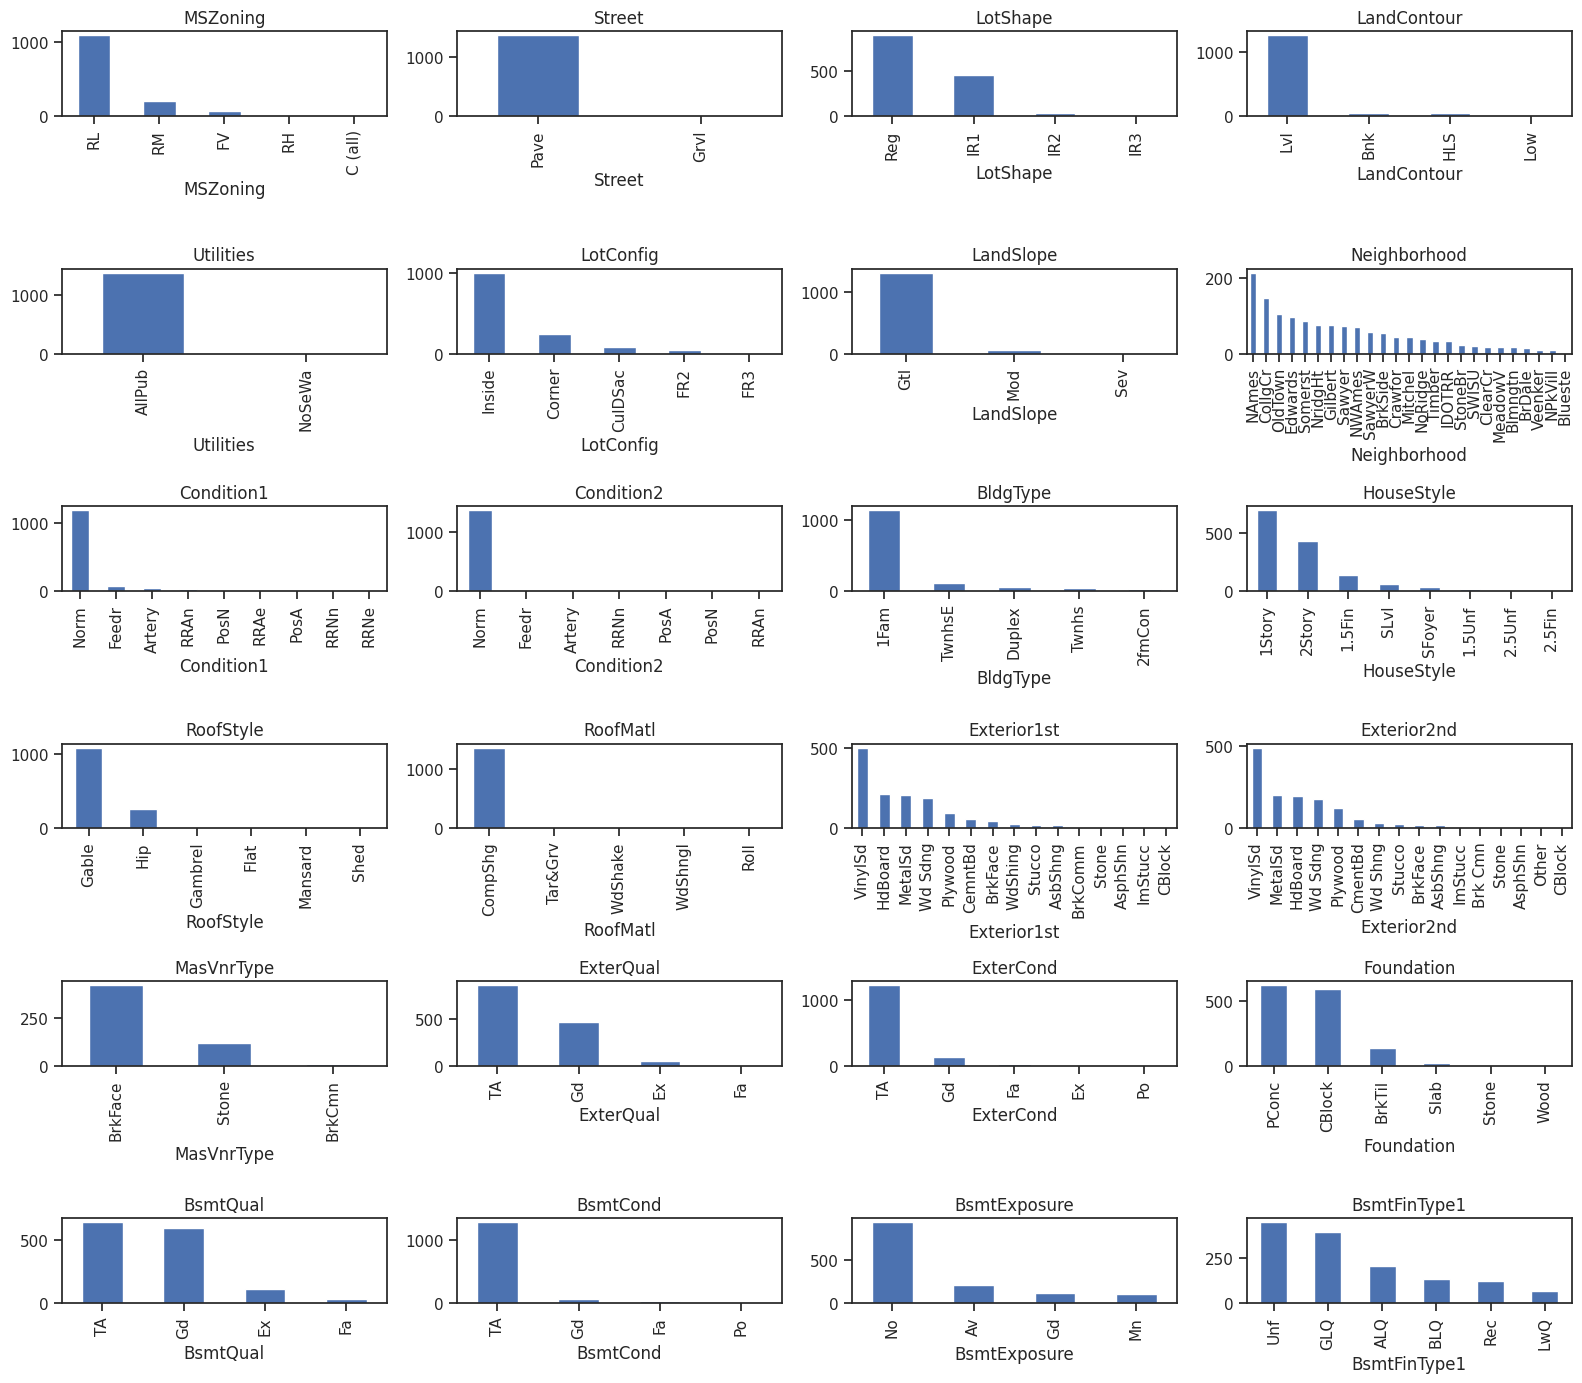

In [41]:
rows, cols = 6,4
fig,axes = plt.subplots(nrows=rows,
                        ncols=cols,
                        figsize=(16,14))
axes=axes.flatten()
for i,c in enumerate(cat_cols[:cols*rows]):
    train_cat_df.iloc[:,i].value_counts().\
                    plot.bar(title=c,ax=axes[i])
plt.tight_layout()

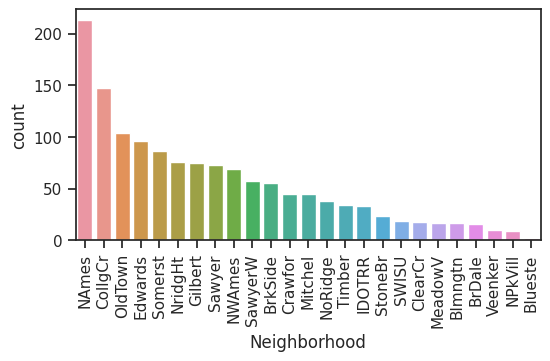

In [42]:
lista = train['Neighborhood'].value_counts().index
sns.countplot(data=train,x ='Neighborhood', order= lista)
xt = plt.xticks(rotation=90)

**Comentários**

1. Os bairros com maior número de negócios são NAmes, CollgCr, e OldTown
2. A maioria dos imóveis são do tipo 1Story ou 2Story
3. A maioria das oferta de imóveis são em zonas de baixa e média densidade (RL e RM)

## 3. Análise Bivariada

Encontrar padrões a partir do nível de correlação entre os atributos. Por exemplo, vamos fazer a correlação de todos os atriutos em relação a SalePrice

In [43]:
correlation = train_num_df.drop(['PoolArea'],axis='columns').corr()
print(correlation['SalePrice'].sort_values(ascending = False)[:10])

SalePrice       1.000000
OverallQual     0.807586
GrLivArea       0.737623
GarageCars      0.654555
TotalBsmtSF     0.649373
GarageArea      0.647588
1stFlrSF        0.626162
FullBath        0.569015
YearBuilt       0.555161
TotRmsAbvGrd    0.553004
Name: SalePrice, dtype: float64


Para continuar a análise iremos utilizar os seguintes tipos de visualizações:

 - Heat Map das correlações
 - Heat Map com as correlações mais importantes
 - Pair Plot 
 - Scatter Plot

### Heat Map das Correlações

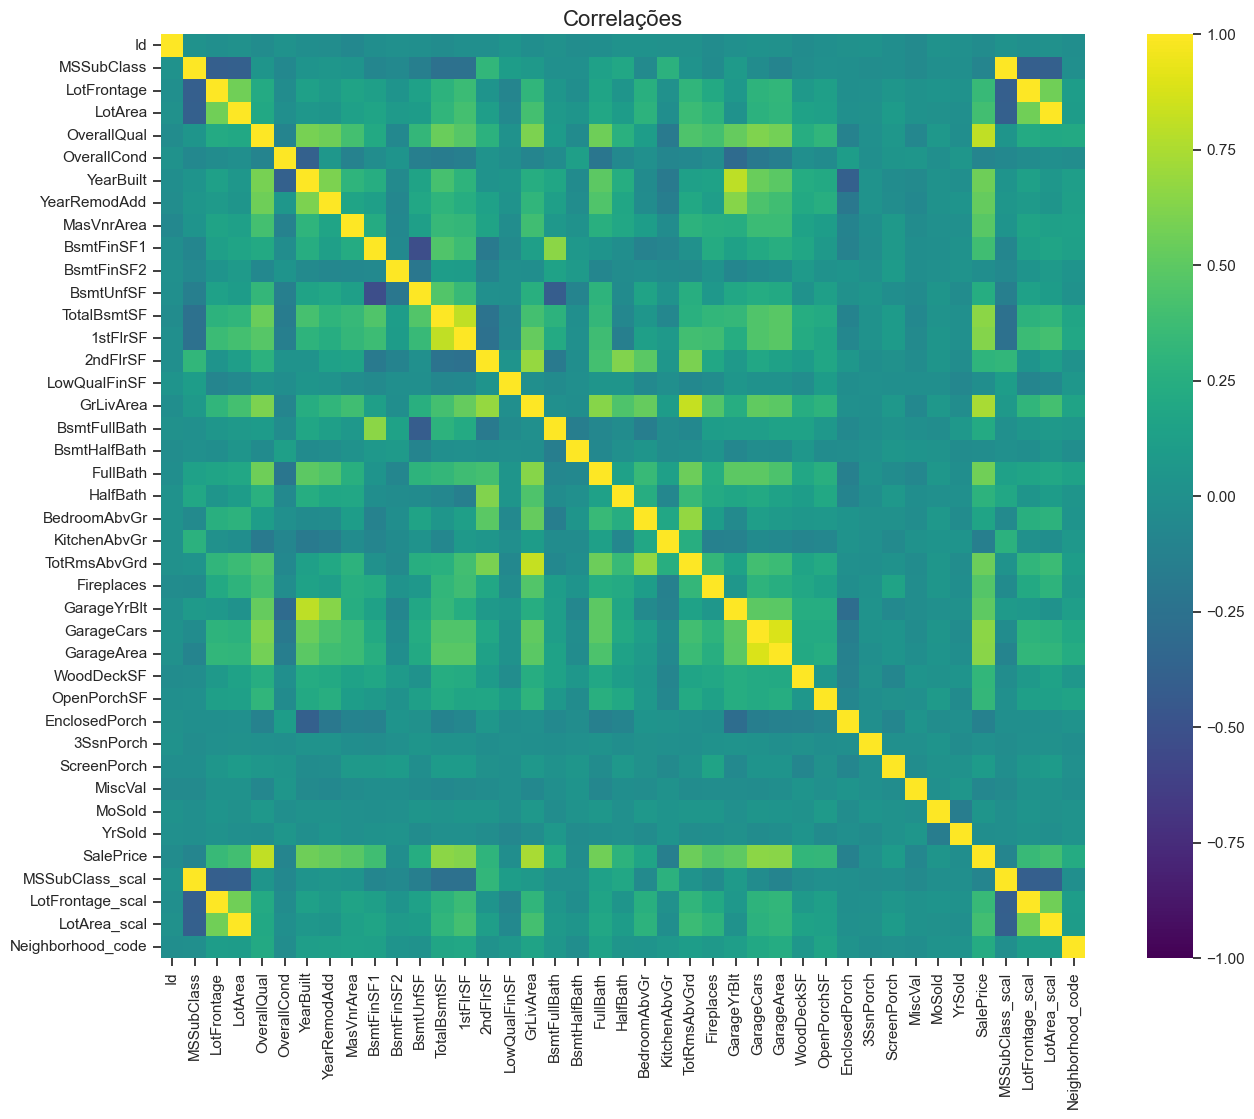

In [53]:
f , ax = plt.subplots(figsize = (16,12))
plt.title('Correlações',y=1,size=16)
sns.heatmap(correlation,
            square = True,
            vmin=-1.0,  
            vmax=1.0, 
            cmap='viridis')
plt.show()

**Comentários**

Em uma inspeção rápida chama a atenção as seguintes correlações:
1. As colunas 'TotalBsmtSF' e '1stFlrSF'.
2. As colunas 'Garage_*'.

Estas correlações são tão fortes que podem indicar um caso de **multicolinearidade**. Se for confirmado, uma de cada par deve ser removida antes de realizar treinamento de alguns algoritmos. Total Basement SQ Foot e First Floor SQ Foot realmente são quase a mesma informação. Faz sentido pensar que basta uma das duas permanecer no dataset.  

Outro ponto importante é que 'SalePrice' tem correlação forte com 'GrLivArea', 'TotalBsmtSF', e 'OverallQual'. Vamos explorar essas e outras colunas em relação a SalePrice em um heatmap em separado.

### Zoomed HeatMap

#### SalePrice Correlation matrix

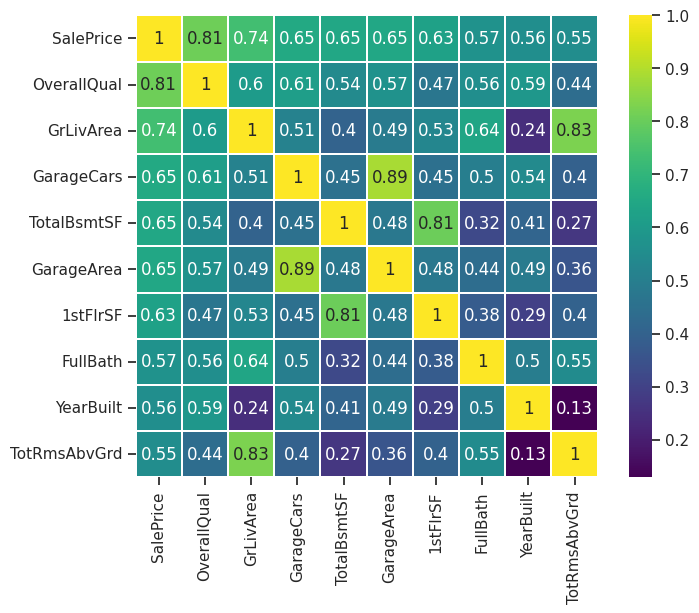

In [44]:
k= 10
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
corr = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr,  
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='viridis',
            linecolor="white",
            xticklabels = cols.values ,
            annot_kws = {'size':12},
            yticklabels = cols.values,
           )
plt.show()

**Comentários**
- 'OverallQual', 'GrLivArea' e 'TotalBsmtSF' são fortemente correlacionados com 'SalePrice'.
- 'GarageCars' and 'GarageArea' são fortemente correlacionadas entre si. Isto decorreto do fato do número de carros que cabe em uma garagem ser proporcional à área da garagem. Portanto, precisamos apenas uma delas. Recomenda-se manter 'GarageCars' já que a correlação com 'SalePrice' é maior.
- 'TotalBsmtSF' e '1stFloor' são fortemente correlacionadas. Recomenda-se manter 'TotalBsmtSF'
- 'TotRmsAbvGrd' e 'GrLivArea' são fortemente correlacionadas
- 'YearBuilt' parece ser fracamente correlacionado com 'SalePrice'. Mas até este ponto da análise, não se pode concluir nada a respeito da relação entre estas duas colunas.

### Pair Plot 

O `sns.pairplot()` permite a visualização de distribuição e scatterplot entre pares dos atributos 'SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd'.

/home/jpac/anaconda3/envs/softex-data-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


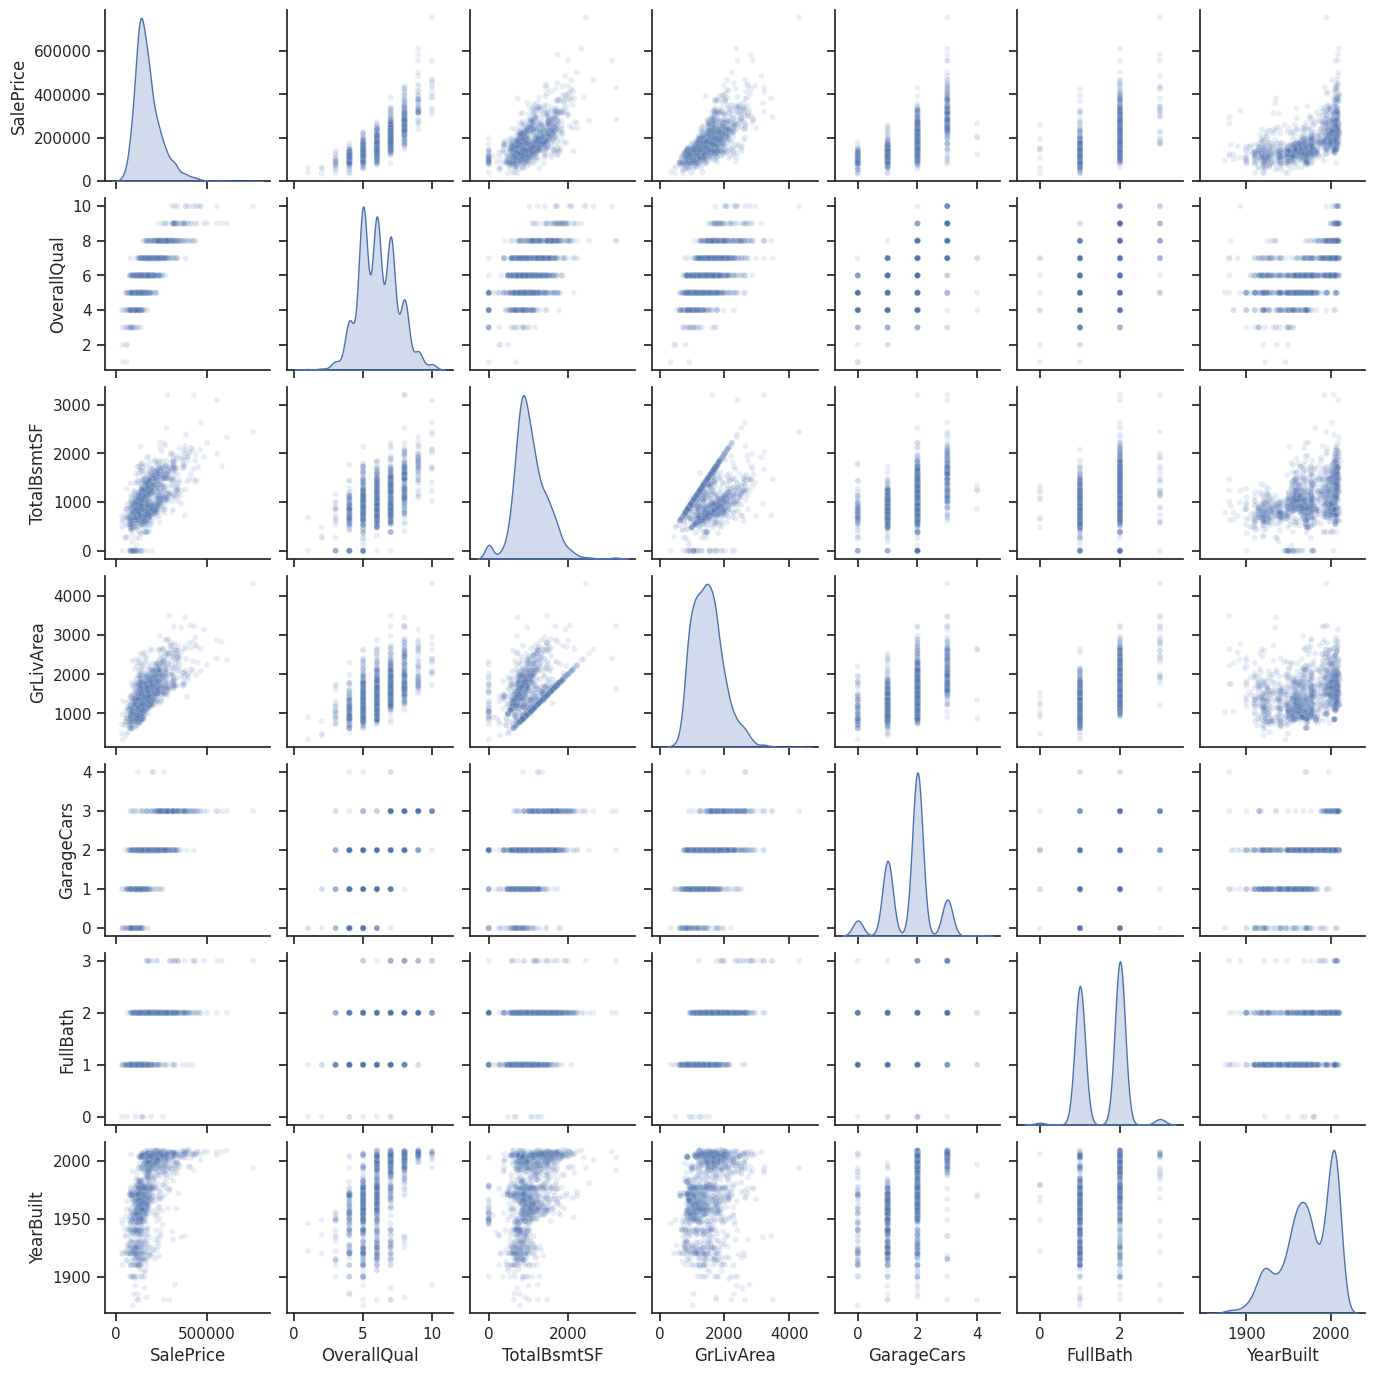

In [45]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt']
sns.pairplot(train[columns],height = 2 ,kind ='scatter',diag_kind='kde',plot_kws=dict(alpha=0.12,size=1))
plt.show()

**Comentários**

- 'TotalBsmtSF' e'GrLiveArea' mostram uma formação de pontos em linha reta, quase como uma borda. Isto acontece porque a área do basement (porão) só pode ser igual ou menor à área útil do térreo. Não é comum um porão ser maior que a área do térreo.

- 'SalePrice' e 'YearBuilt'. Na parte de baixo da nuvem de pontos, pode-se ver uma relação não liner, talvez exponencial. 

- A ultima observação é que os preços estão aumentando mais rapidamente em relação aos anos anteriores.

### Scatter Plot 

#### Scatter plots between the most correlated variables

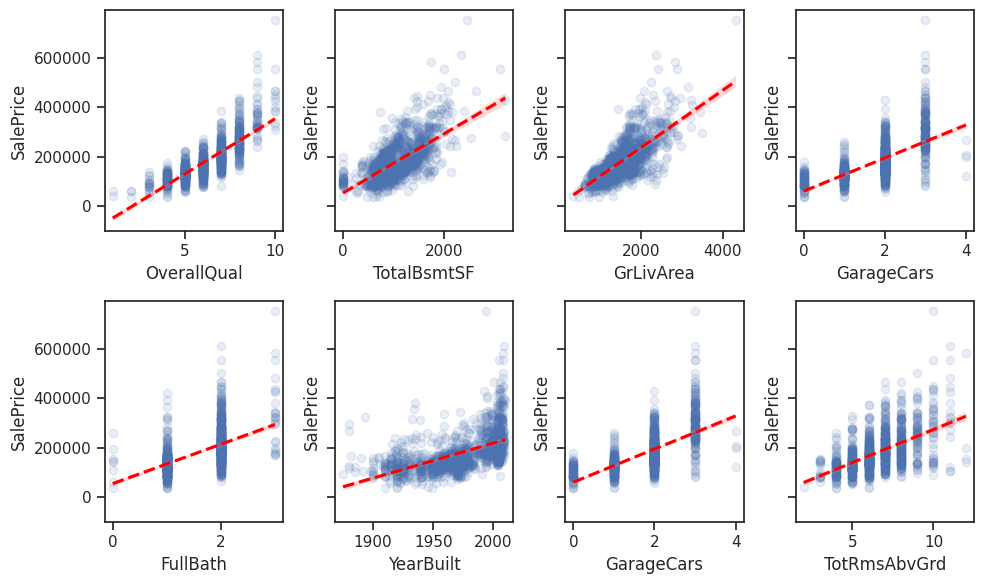

In [46]:
 
cols = ['OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','GarageCars', 'TotRmsAbvGrd']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6),sharey=True)
axes= axes.flatten()
for i,col in enumerate(cols):
    sns.regplot(y='SalePrice',x=col,data = train[['SalePrice',col]],fit_reg=True, ax=axes[i],scatter_kws=dict(alpha=0.12),line_kws=dict(color='red',linestyle='--'))
    
plt.tight_layout()

Text(0, 0.5, 'Mean Sale Price')

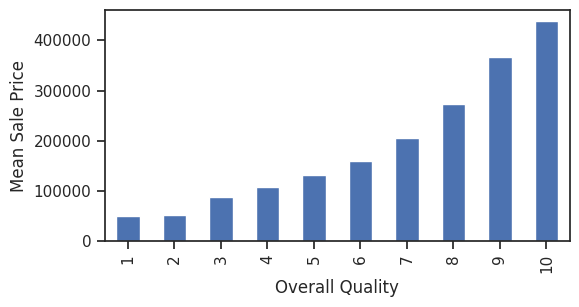

In [47]:
train.groupby(by='OverallQual')['SalePrice'].mean().plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')

#### SalePrice em relação à colunas do tipo não numéricas

Podemos utilizar boxplots para analisar a relação entre SalePrice e variáveis qualitativas.  

In [48]:
def box_feature(df,x,y,**kwargs):
    data = df[[x,y]]
    gb = df.groupby(by=x).median(numeric_only=True)
    lista = gb.sort_values(by=y,ascending=True).index.to_list()
    fig = sns.boxplot(data=df,x=x, y=y,order=lista,**kwargs)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);    

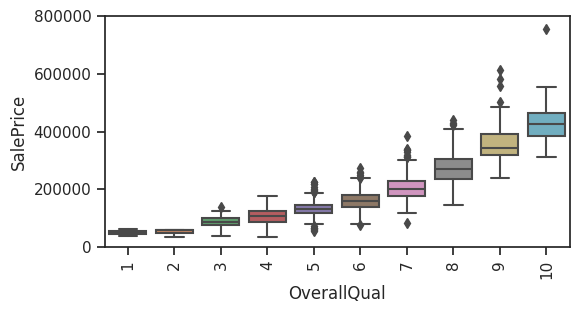

In [49]:
box_feature(df=train,y='SalePrice',x='OverallQual')

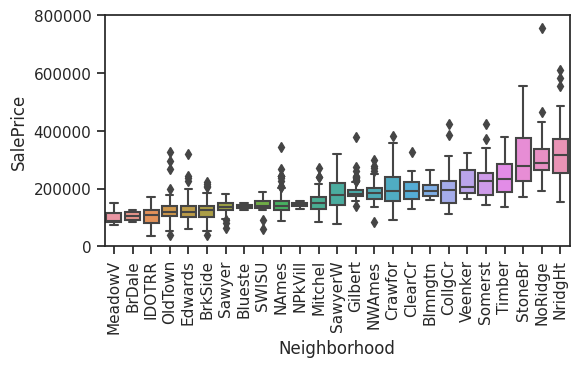

In [50]:
box_feature(df=train,y="SalePrice",x="Neighborhood")

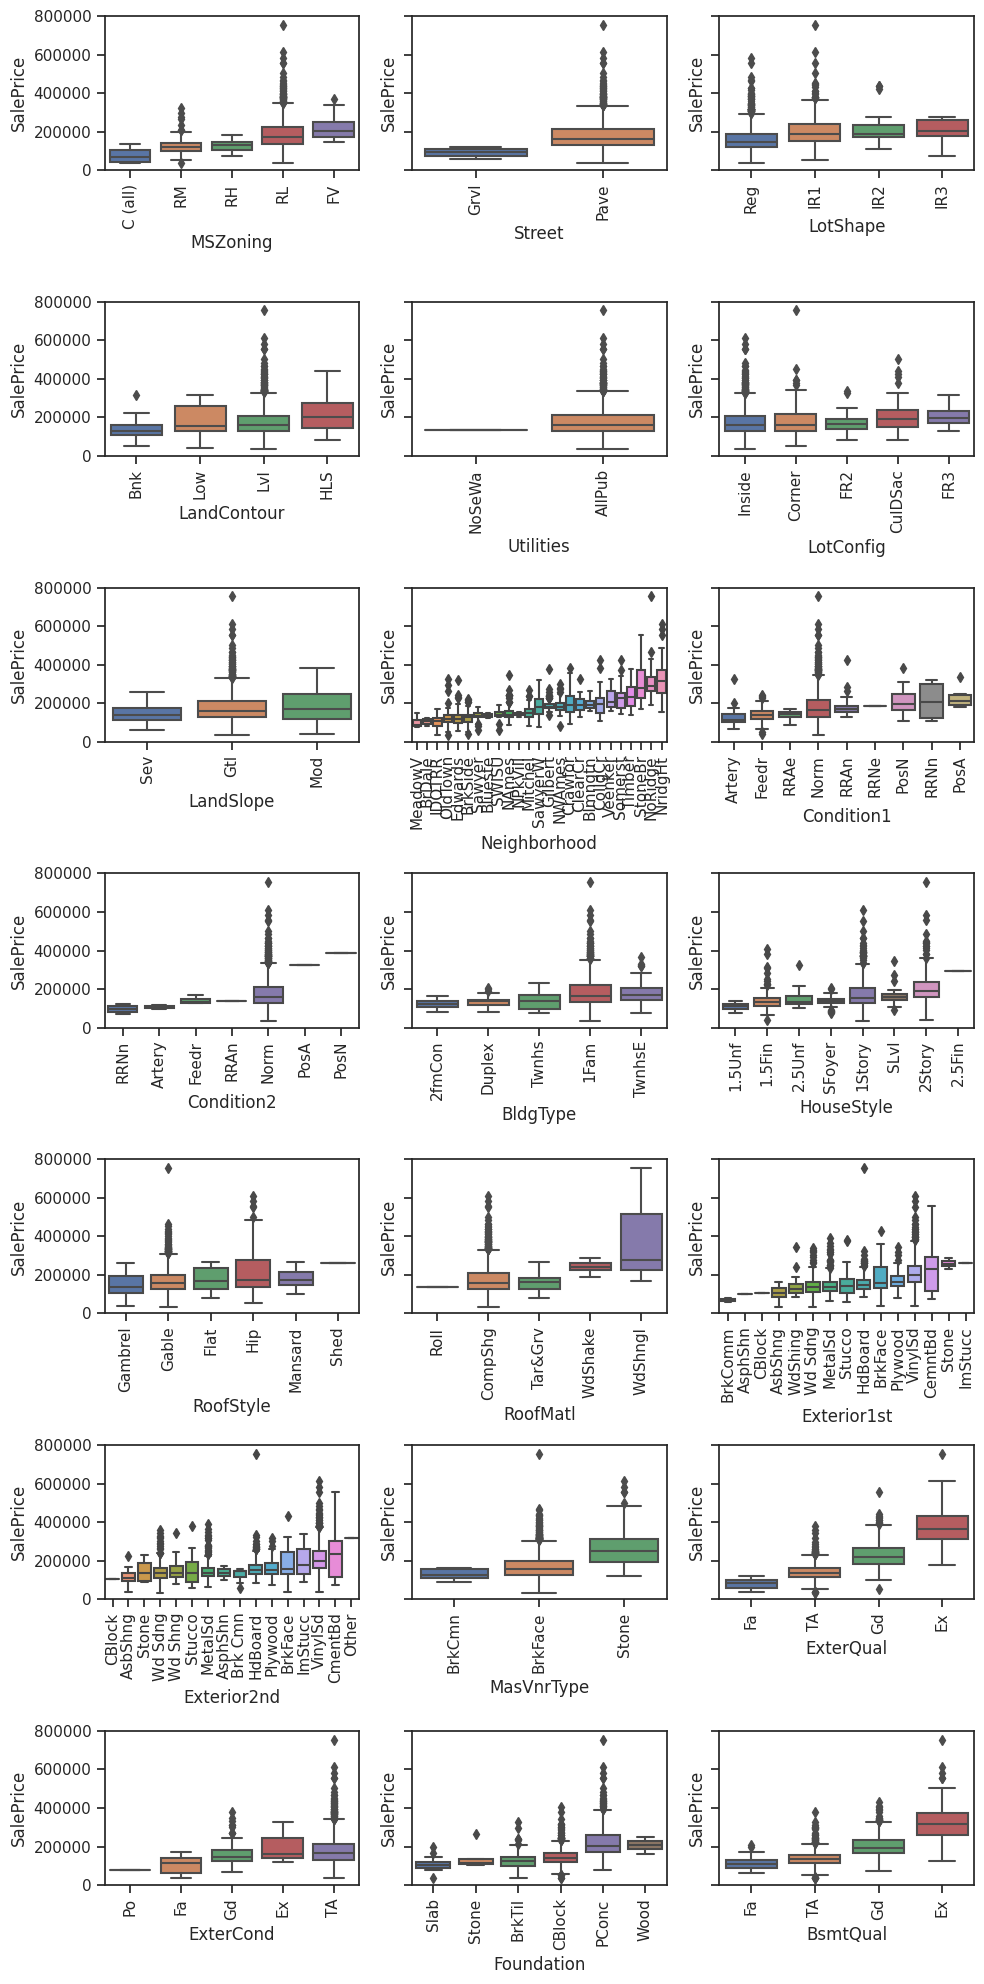

In [51]:
rows=7
cols=3
fig,axes = plt.subplots(nrows=rows,ncols=cols,figsize=(10,20),sharey=True)
axes = axes.flatten()
for i,c in enumerate(cat_cols[:rows*cols]):
    box_feature(df=train,y='SalePrice',x=c,ax=axes[i])
    axes[i].tick_params(axis='x',rotation=90)
plt.tight_layout()

#### Housing Price vs Sales

- Sale Type & Condition
- Sales Seasonality

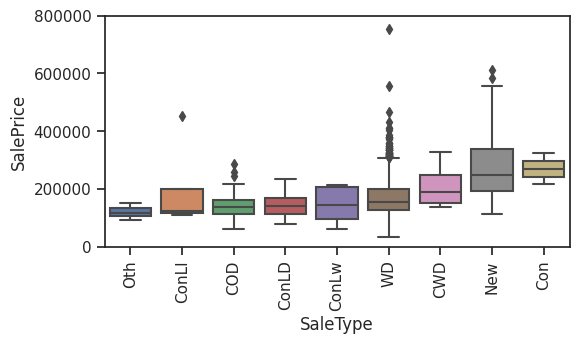

In [52]:
box_feature(df=train,y="SalePrice",x="SaleType")

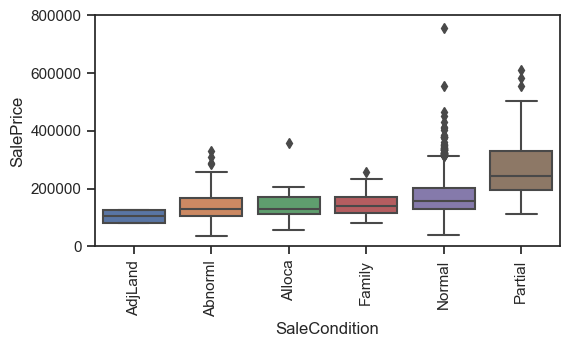

In [63]:
box_feature(df=train,y="SalePrice",x="SaleCondition")

#### ViolinPlot - Functional vs.SalePrice

<Axes: xlabel='Functional', ylabel='SalePrice'>

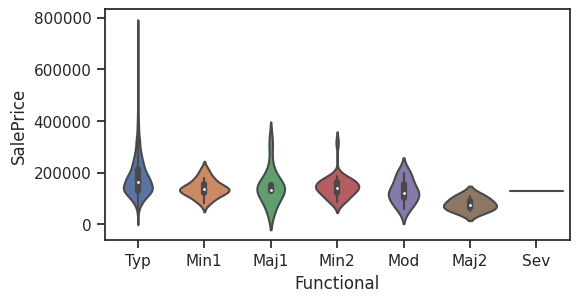

In [53]:
sns.violinplot(data = train,x='Functional', y='SalePrice')

#### Facet Grid Plot - FirePlace QC vs.SalePrice

/home/jpac/anaconda3/envs/softex-data-visualization/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


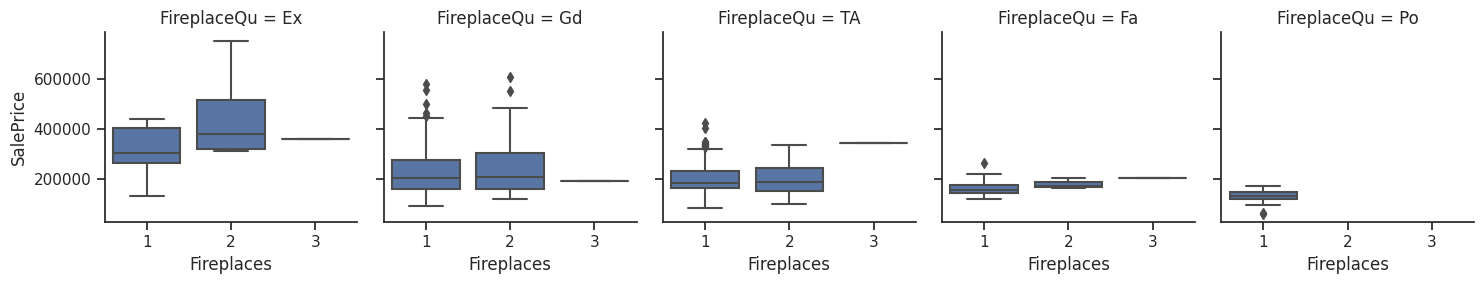

In [54]:
g = sns.FacetGrid(train, col = 'FireplaceQu', col_wrap = 5, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3])

**Comentário**

A qualidade da lareira parece ser mais importante para determinar o SalePrice que o número delas em uma casa. 


# 4. Sumário da análise exploratória

## Análise Univariada
 1. Variáveis não normais que mais chamaram a atenção
 1. Variáveis categóricas com poucas categorias
 1. Variáveis categóricas com muitas categorias
 1. Recomendações 

## Análise Bivariada

 1. Suspeita de multicolinearidade
 1. Sugestão de remoção de variáveis altamente correlaciondas
 1. Principais indícios de padrões (insights) encontrado
 
## Outros pontos relevantes
 1. Tipos de aprendizagem de máquina sugeridos
 2. Testes de hipótese



# 5. Conclusão

Este exemplo, embora extenso, mostra apenas uma forma simplificada de análise. Na prática essa etapa é iterativa e não é realizada em uma única vez. Pode ser realizado de modo iterativo retornando após aplicar os tratamentos para cada problema identificado. 

Nesta etapa também pode se decidir criar scripts que automatizam os tratamentos realizados manualmente aqui. Também é possível gerar versões limpas e transormadas dos datasets para serem utilizados nas próximas etapas.

Utilize esse notebook para estudar e ter uma visão geral das etapas de analise exploratória, bem como o tipo de resultados que se pode encontar. 